### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go #
from plotly.subplots import make_subplots

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [160]:
data = pd.read_csv('coupons.csv')

In [161]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [10]:
data.shape

(12684, 25)

In [162]:
#find the null values
data.isna().sum()/len(data)

destination             0.000000
passanger               0.000000
weather                 0.000000
temperature             0.000000
time                    0.000000
coupon                  0.000000
expiration              0.000000
gender                  0.000000
age                     0.000000
maritalStatus           0.000000
has_children            0.000000
education               0.000000
occupation              0.000000
income                  0.000000
car                     0.991485
Bar                     0.008436
CoffeeHouse             0.017108
CarryAway               0.011905
RestaurantLessThan20    0.010249
Restaurant20To50        0.014901
toCoupon_GEQ5min        0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ25min       0.000000
direction_same          0.000000
direction_opp           0.000000
Y                       0.000000
dtype: float64

3. Decide what to do about your missing data -- drop, replace, other...

In [163]:
#drop the car column since 99% of the data are missing
data.drop('car', axis=1, inplace=True)

In [164]:
#drop null values from carryAway column
data = data[data['CarryAway'].notna()]

In [165]:
# drop null values from coffee house column
data = data[data['CoffeeHouse'].notna()]

In [166]:
#drop null values from Restaurant 20 to 50 column
data = data[data['Restaurant20To50'].notna()]

In [167]:
#drop null values from Restaurant less than 20
data = data[data['RestaurantLessThan20'].notna()]

In [168]:
#drop null values from bar column
data = data[data['Bar'].notna()]

In [17]:
data.shape

(12079, 25)

In [169]:
#check the null values
data.isna().sum()/len(data)

destination             0.0
passanger               0.0
weather                 0.0
temperature             0.0
time                    0.0
coupon                  0.0
expiration              0.0
gender                  0.0
age                     0.0
maritalStatus           0.0
has_children            0.0
education               0.0
occupation              0.0
income                  0.0
Bar                     0.0
CoffeeHouse             0.0
CarryAway               0.0
RestaurantLessThan20    0.0
Restaurant20To50        0.0
toCoupon_GEQ5min        0.0
toCoupon_GEQ15min       0.0
toCoupon_GEQ25min       0.0
direction_same          0.0
direction_opp           0.0
Y                       0.0
dtype: float64

4. What proportion of the total observations chose to accept the coupon? 



In [170]:
data['Y'].value_counts()/len(data)

1    0.569335
0    0.430665
Name: Y, dtype: float64

56% of total observations chose to accept the coupon

5. Use a bar plot to visualize the `coupon` column.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Coupon visualization')

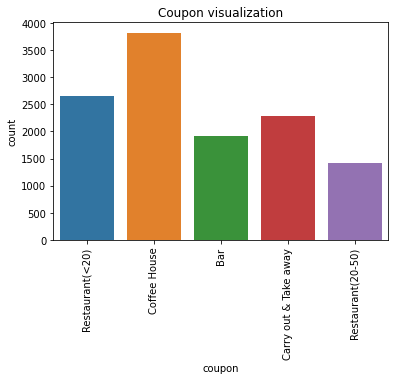

In [171]:
sns.countplot(data['coupon'])
plt.xticks(rotation=90)
plt.title("Coupon visualization")

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temperature histogram')

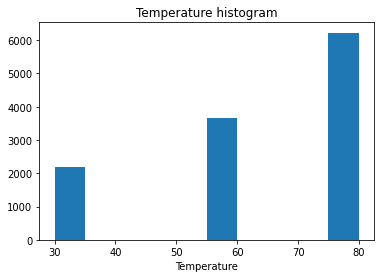

In [172]:
plt.hist(data['temperature'])
plt.xlabel('Temperature')
plt.title("Temperature histogram")

In [173]:
# There are only three temperatures 80, 55 and 30

In [174]:
data['temperature'].value_counts()

80    6222
55    3662
30    2195
Name: temperature, dtype: int64

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [175]:
#query data for the coupon "BAR"
bar_data = data.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [176]:
bar_data['Y'].value_counts()

0    1125
1     788
Name: Y, dtype: int64

In [177]:
px.pie(data, names="Y", title = "Proportion of bar coupons")

### 56.9% of bar coupons were accepted

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [178]:
bar_data['Bar'].value_counts()

never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: Bar, dtype: int64

In [179]:
#query data for the customer who visited the bar three or fewer times
three_or_fewer = bar_data[bar_data['Bar'].isin(['less1','1~3'])]
# query data for the customers who visitied the bar more than three times
more_than_three = bar_data[bar_data['Bar'].isin(['4~8','gt8'])]


In [180]:
three_or_fewer['Y'].value_counts()/len(three_or_fewer)

1    0.527897
0    0.472103
Name: Y, dtype: float64

In [181]:
more_than_three['Y'].value_counts()/len(more_than_three)

1    0.761658
0    0.238342
Name: Y, dtype: float64

In [182]:
px.pie(three_or_fewer, names="Y", title = "Acceptance rate for 3 or fewer times")

In [183]:
px.pie(more_than_three, names="Y", title = "Acceptance rate for more than three times")

### 76.2 % customers accepted the coupon who went to the bar more than three time 
and 52.8% of customers accepted the coupon who went to the bar three or fewer times

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [184]:
visit_more_than_once = bar_data[bar_data['Bar'].isin(['1~3','4~8','gt8'])]

In [185]:
visit_more_than_once['Bar'].value_counts()

1~3    379
4~8    147
gt8     46
Name: Bar, dtype: int64

In [186]:
visit_more_than_once['age'].value_counts()

21         159
26         159
31          93
50plus      63
36          40
41          32
46          16
below21     10
Name: age, dtype: int64

In [187]:
#Subset the data for the customers with the age over 25
age_over_25 = visit_more_than_once[visit_more_than_once['age'].isin(['26','31','50plus','36','41','46'])]

In [188]:
#subset the data for the customers with the age less than 25
age_below_25 = visit_more_than_once[visit_more_than_once['age'].isin(['21','below21'])]

In [189]:
age_over_25['Y'].value_counts()/len(age_over_25)

1    0.689826
0    0.310174
Name: Y, dtype: float64

In [190]:
age_below_25['Y'].value_counts()/len(age_below_25)

1    0.674556
0    0.325444
Name: Y, dtype: float64

the acceptance rate between drivers who go to a bar more than once a month 
and are over the age of 25 to the all others are almost equal with the percentage of 68% and 67% respectively


In [191]:
bar_data.shape

(1913, 25)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

Results: Customers who frequently visits bar every month also accepts the coupons regardless of the age.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'coupon types')

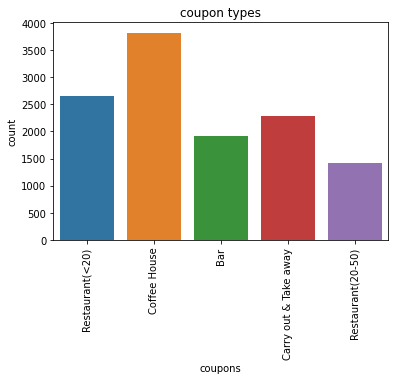

In [192]:
sns.countplot(data['coupon'])
plt.xlabel('coupons')
plt.xticks(rotation=90)
plt.title("coupon types")

# Coffee House Exploration

In [194]:
#query data for the coupon value coffee house
coffee_house =  data.query('coupon == "Coffee House"')

In [195]:
coffee_house.shape
# There are 3816 data points for the coffee house coupon

(3816, 25)

In [196]:
coffee_house.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

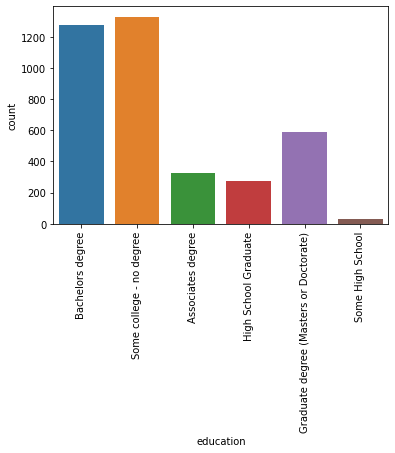

In [197]:
sns.countplot(coffee_house['education'])
plt.xticks(rotation=90)

In [198]:
coffee_house['has_children'].value_counts()

0    2360
1    1456
Name: has_children, dtype: int64

In [199]:
coffee_house.query("has_children == 1")['Y'].value_counts()

0    746
1    710
Name: Y, dtype: int64

In [200]:
coffee_house.query("has_children == 0")['Y'].value_counts()

1    1184
0    1176
Name: Y, dtype: int64

Analysis: Acceptance of coupon have very less correlation based on children data

In [201]:
coffee_house['CoffeeHouse'].value_counts()

less1    1052
1~3      1019
never     896
4~8       507
gt8       342
Name: CoffeeHouse, dtype: int64

In [202]:
#Select data of customers who visited the coffee house more than once
visit_more_than_once = coffee_house[coffee_house['CoffeeHouse'].isin(['1~3','4~8','gt8'])]

In [203]:
#Select data of customers who visited the coffee house less than once
visit_less_than_once = coffee_house[coffee_house['CoffeeHouse'].isin(['less1'])]

In [204]:
fig = px.pie(visit_more_than_once, names="Y", title = "visited more than once")
fig.update_layout(width=300, height=300)
fig.show()

In [205]:
fig = px.pie(visit_less_than_once, names="Y", title = "visited less than once")
fig.update_layout(width=300, height=300)
fig.show()

Analysis: People who visited the coffee house more than once are more likely to accept the coupons

In [206]:
coffee_house.query('occupation == "Student"')['Y'].value_counts()

1    292
0    183
Name: Y, dtype: int64

In [207]:
coffee_house['occupation'].value_counts()

Unemployed                                   551
Student                                      475
Computer & Mathematical                      433
Sales & Related                              348
Education&Training&Library                   273
Management                                   271
Office & Administrative Support              192
Arts Design Entertainment Sports & Media     190
Retired                                      161
Business & Financial                         142
Food Preparation & Serving Related            77
Transportation & Material Moving              76
Healthcare Practitioners & Technical          71
Legal                                         69
Community & Social Services                   66
Healthcare Support                            65
Architecture & Engineering                    63
Life Physical Social Science                  61
Protective Service                            58
Construction & Extraction                     46
Installation Mainten

In [208]:
coffee_house.query('occupation == "Computer & Mathematical"')['Y'].value_counts()

1    217
0    216
Name: Y, dtype: int64

Text(0.5, 1.0, 'Acceptance of coupons based on occupation')

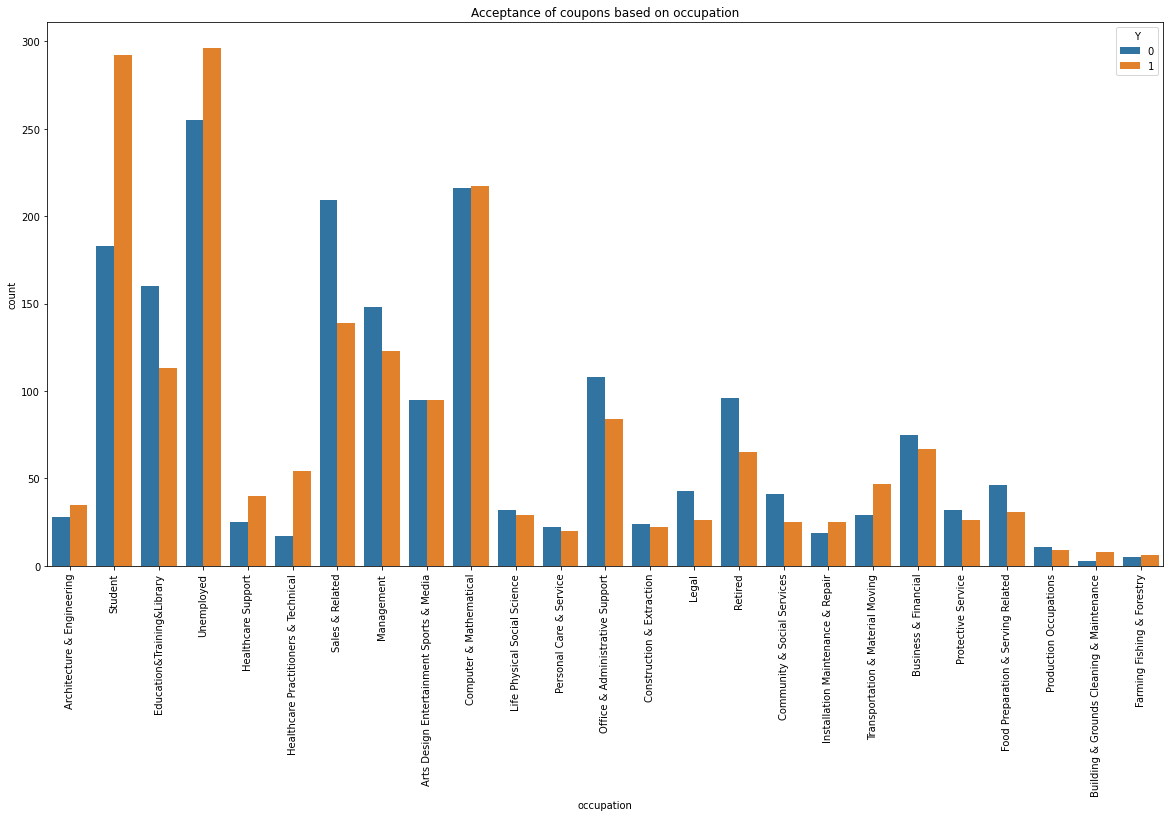

In [209]:
plt.figure(figsize=(20,10))

sns.countplot(x="occupation", hue="Y", data=coffee_house)
plt.xticks(rotation=90)
plt.title("Acceptance of coupons based on occupation")

**Analysis:** According to the above plot, Students and unemployed are more likely to accept the coupons
when compared to the other sectors.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Income analysis')

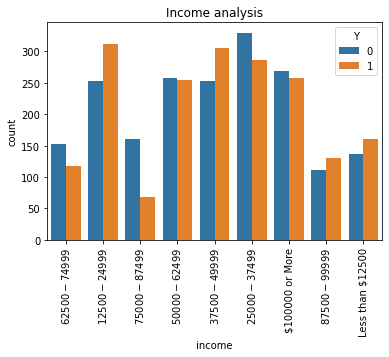

In [210]:
sns.countplot(coffee_house['income'], hue=coffee_house['Y'])
plt.xticks(rotation=90)
plt.title("Income analysis")

Analysis: Most of the customers who accepted the coupon falls under the salary category 12500 - 24999 and 37500-49999